### Introduction


In these slides we will present the CART (Classification and Regression Tree) algorithm for constructing a decision tree based on a training data set. 

--

Decision tree learning algorithms basically use inequalities to break data down into more and more "pure" parts.



There are two main notions of "purity".


#### The gini impurity measure

Suppose we have a dataset $\mathcal{D}$ with $n_k$ instances from class $k$ for $k=1,2,3,\ldots,K$. 

Let $N$ be the total amount of data, $N = |\mathcal{D}|$.

Then the gini impurity of $\mathcal{D}$ is

$$G = 1-\sum_{k=1}^K (\frac{n_k}{N})^2$$



### Example

Suppose we have a fruit basket with 3 apples (A), 8 bananas (B), 2 cucumbers (C), and 1 dragon fruit (D).

Then the gini impurity of the fruit basket is computed as follows.

$N = 3+8+2+1 = 14$,

$G = 1-(\frac{3}{14})^2-(\frac{8}{14})^2-(\frac{2}{14})^2-(\frac{1}{14})^2$

We can compute this in python below.


In [1]:
import numpy as np

fruit = np.array([3,8,2,1])

fruit = fruit/np.sum(fruit)

1 - np.sum(fruit*fruit)

0.6020408163265306

Note that if we make the basket more "pure" then $G$ decreases.



In [2]:
fruit = np.array([1,12,0,1])

fruit = fruit/np.sum(fruit)

1 - np.sum(fruit*fruit)

0.2551020408163267

And if the basket contains only bananas then $G$ is zero (maximum purity).



In [3]:
fruit = np.array([0,14,0,0])

fruit = fruit/np.sum(fruit)

1 - np.sum(fruit*fruit)

0.0

### Decision Trees

Decision trees work recursively basically doing the following trick over and over.

At a node we have a dataset $\mathcal{D}$ with $n_k$ instances from class $k$ for $k=1,2,3,\ldots,K$. 

Let $N$ be the total amount of data, $N = |\mathcal{D}|$.

A given $\bar{x}$ occuring in $\mathcal{D}$ has $d$ coordinate values:

$\bar{x} = (x_1,x_2,\ldots,x_d)$.


For a given $t \in \{1,2,\ldots,d\}$ and a value $r \in \mathbb{R}$ we can partition the data into two parts:

$\mathcal{D}_L = \{(\bar{x},y)\in\mathcal{D} : x_t \leq r\}$

$\mathcal{D}_R = \{(\bar{x},y)\in\mathcal{D} : x_t > r\}$


Let $N_L = |\mathcal{D}_L|$ and $N_R = |\mathcal{D}_R|$. 

Then we can compute the expected reduction in impurity that results from the partition given by $t$ and $r$:

$$G_{new} = \frac{N_L}{N}G_L + \frac{N_R}{N}G_R$$

where $G_L$ is the gini impurity of $\mathcal{D}_L$ and $G_R$ is the gini impurity of $\mathcal{D}_R$.


Let $(t^*,r^*)$ be the $t$ and $r$ that minimize $G_{new}$, and $\mathcal{D}_L$, $\mathcal{D}_R$ the resulting partition of $\mathcal{D}$.

We now give the current node a left descendant with data $\mathcal{D}_L$ and a right descendant with data $\mathcal{D}_R$. 




### Example

Look at the 3 class example in this directory (`sample_data.xoj`).

I'll enter it below.

Here $N = 9$ and $K=3$.




In [4]:
X = np.array([[-2,1],[-1.4,1.2],[-1.3,0.5],[7,.5],
             [8,0.4],[7.1,-0.2],[-1.45,-1],[-1.2,-1.1],
              [-0.8,-1.2]])
y = np.array([0,0,0,1,1,1,2,2,2])

In [5]:
X,y

(array([[-2.  ,  1.  ],
        [-1.4 ,  1.2 ],
        [-1.3 ,  0.5 ],
        [ 7.  ,  0.5 ],
        [ 8.  ,  0.4 ],
        [ 7.1 , -0.2 ],
        [-1.45, -1.  ],
        [-1.2 , -1.1 ],
        [-0.8 , -1.2 ]]),
 array([0, 0, 0, 1, 1, 1, 2, 2, 2]))

### An optimal division

Now let's pick the $t \in \{1,2\}$ and the $r \in \mathbb{R}$ that make the partition that most reduces impurity.



In [6]:
def gini(_y):
    G = 1
    for k in set(_y):
        G -= (np.sum(_y==k)/len(_y))**2
    return G
    
def new_impurity(t,r,X,y):
    D_L = y[X[:,t] <= r]
    D_R = y[X[:,t] > r]
    p1 = len(D_L)/X.shape[0]
    p2 = len(D_R)/X.shape[0]
    G_L,G_R = gini(D_L),gini(D_R)
    return p1*G_L + p2*G_R
    
results = []

for t in [0,1]:
    for r in X[:,t]:
        ni = new_impurity(t,r,X,y)
        results.append([ni,t,r])
        
results        

[[0.5833333333333333, 0, -2.0],
 [0.5555555555555556, 0, -1.4],
 [0.43333333333333335, 0, -1.3],
 [0.4761904761904762, 0, 7.0],
 [0.6666666666666665, 0, 8.0],
 [0.5833333333333333, 0, 7.1],
 [0.6190476190476191, 0, -1.45],
 [0.43333333333333335, 0, -1.2],
 [0.3333333333333333, 0, -0.8],
 [0.5833333333333333, 1, 1.0],
 [0.6666666666666665, 1, 1.2],
 [0.4761904761904762, 1, 0.5],
 [0.4761904761904762, 1, 0.5],
 [0.43333333333333335, 1, 0.4],
 [0.43333333333333335, 1, -0.2],
 [0.3333333333333333, 1, -1.0],
 [0.4761904761904762, 1, -1.1],
 [0.5833333333333333, 1, -1.2]]

### The best choice

One optimal choice is $(t^*,r^*) = (0,-0.8)$.

This basically means we will divide the data based on the inequality

$$x_1 \leq -0.8$$

After we do this $\mathcal{D}_R$ contains only the green points, so the impurity is 0. 

And $\mathcal{D}_L$ has three black points and three red. 

We could now recurse on $\mathcal{D}_L$ to get another division.


In [7]:

X_2 = X[X[:,0]<= -0.8]
y_2 = y[X[:,0] <= -0.8]


results = []

for t in [0,1]:
    for r in X_2[:,t]:
        ni = new_impurity(t,r,X_2,y_2)
        results.append([ni,t,r])
        
results 

[[0.4, 0, -2.0],
 [0.4444444444444444, 0, -1.4],
 [0.25, 0, -1.3],
 [0.5, 0, -1.45],
 [0.4, 0, -1.2],
 [0.5, 0, -0.8],
 [0.4, 1, 1.0],
 [0.5, 1, 1.2],
 [0.25, 1, 0.5],
 [0.0, 1, -1.0],
 [0.25, 1, -1.1],
 [0.4, 1, -1.2]]

### Done!

We now see that an expected impurity of 0 is achieved when we branch on the condition 

$x_2 \leq -1$


This produces a decision tree with zero training error.


The tree takes an input $\bar{x} = (x_1,x_2)$ and says:

```
    if x_1 > 0.8:
        return "green"
    if x_2 <= -1:
        return "red"
    return "black"
```

Usually we represent this visually as a tree (though it's also a simple computer program).




### White box

This is a "white box model".



### When to stop

We could always stop when we achieve 0 purity but we will get a lot of overfitting.

We need to constrain the development of the tree in some way.

Regularization!

To see the conditions we might use we can refer to the sklearn docs:

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier





### Entropy for impurity

Suppose we have a dataset $\mathcal{D}$ with $n_k$ instances from class $k$ for $k=1,2,3,\ldots,K$. 

Let $N$ be the total amount of data, $N = |\mathcal{D}|$.

This gives rise to a discrete probability distribution

$$ P = \{p_1,p_2,\ldots,p_K\}$$

where $p_k = \frac{n_k}{N}$ is the probability that a randomly chosen instance is in class $k$.

An alternative measure for the "purity" of $\mathcal{D}$ is the entropy of $P$. 

The entropy of $P$ is defined by

$$H = -\sum_{k=1}^K p_k \log(p_k).$$

When $p_k = 0$, $p_k\log(p_k)$ is defined to be 0. 

Similar to the gini measure, an entropy of 0 means no impurity, and higher entropy means more impurity.





### Example

Suppose we have a fruit basket with 3 apples (A), 8 bananas (B), 2 cucumbers (C), and 1 dragon fruit (D).

Then the gini impurity of the fruit basket is computed as follows.

$N = 3+8+2+1 = 14$,

$H = -(\frac{3}{14})\log(\frac{3}{14})-(\frac{8}{14})\log(\frac{8}{14})-(\frac{2}{14})\log(\frac{2}{14})-(\frac{1}{14})\log(\frac{1}{14})$

We can compute this in python below.


In [8]:
import numpy as np

fruit = np.array([3,8,2,1])

log = lambda x: np.log(x)  ## for "nats"

fruit = fruit/np.sum(fruit)

H = -fruit@log(fruit)

H



1.1163670752893369

In [9]:
fruit = np.array([3,8,2,1])

log = lambda x: np.log2(x)  ## for "bits"

fruit = fruit/np.sum(fruit)

H = -fruit@log(fruit)

H


1.610577243331642

### Does it make a difference?

If we reran our example with entropy rather than gini the result would be the same. 


In [10]:
def entropy(_y):
    if len(_y)==0:
        return 0
    P = []
    for k in set(_y):
        P.append(np.sum(_y==k))
    P /= np.sum(P)
    
    
    return - P@np.log(P)

    
def new_impurity(t,r,X,y):
    D_L = y[X[:,t] <= r]
    D_R = y[X[:,t] > r]
    p1 = len(D_L)/X.shape[0]
    p2 = len(D_R)/X.shape[0]
    H_L,H_R = entropy(D_L),entropy(D_R)
    return p1*H_L + p2*H_R
    
results = []

for t in [0,1]:
    for r in X[:,t]:
        ni = new_impurity(t,r,X,y)
        results.append([ni,t,r])
        
results        

[[0.9619515822566819, 0, -2.0],
 [0.8864408992365055, 0, -1.4],
 [0.6238221015023906, 0, -1.3],
 [0.7810774790420595, 0, 7.0],
 [1.0986122886681098, 0, 8.0],
 [0.9619515822566819, 0, 7.1],
 [0.9932488684736638, 0, -1.45],
 [0.6238221015023906, 0, -1.2],
 [0.46209812037329684, 0, -0.8],
 [0.9619515822566819, 1, 1.0],
 [1.0986122886681098, 1, 1.2],
 [0.7810774790420595, 1, 0.5],
 [0.7810774790420595, 1, 0.5],
 [0.6238221015023906, 1, 0.4],
 [0.6238221015023906, 1, -0.2],
 [0.46209812037329684, 1, -1.0],
 [0.7810774790420595, 1, -1.1],
 [0.961951582256682, 1, -1.2]]

### Computational Cost


CART is a way to approximate the "perfect" tree based on the dataset.

The CART tree is not necessarily the optimal tree, because it uses a greedy strategy, always taking the action that seems best at each node.

But it might be better to not always be greedy. 

Discovering the actual optimal tree is known to be an NP-complete problem.

What are the computational costs of training and prediciton using CART?


**Prediction** To make a prediction we must go from the root of the tree to a leaf.  There are roughly $\log_2(N)$ levels to the tree.  This is the cost of a prediction.

**Training**  To build the tree we must visit each of the $N\log(N)$ nodes and consider each of the $d$ data columns.  Thus the cost of training is roughly $O(dN\log(N))$.





### Post pruning

Some other decision tree algorithms (ie not CART) use a process called post-pruning.

The idea is to create an uncontrained tree which achieves perfect purity in its leaf nodes.

Then post-pruning is applied as a kind of regularization to improve generalization power.

You destroy parent nodes from the bottom up based on certain criteria.

One criterion:  *Is the improvement in purity resulting from a parent of two leaf nodes better than what you might expect by pure chance?*



###  Real Data

Let's look at CART on some real data...

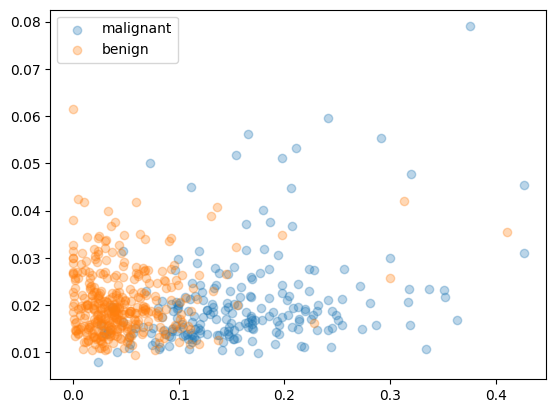

In [11]:
import matplotlib.pyplot as plt

D = np.loadtxt(open("../NN/num_data.txt", "rb"), delimiter=",", skiprows=0)


x  = D[:,8]
y  = D[:,20]

malignant = D[:,1]==1  ## Column 1 represents benign (0) or malignant (1)
xm = x[malignant]
ym = y[malignant]

benign = D[:,1]==0
xb = x[benign]
yb = y[benign]

plt.scatter(xm,ym,label="malignant",alpha=0.3)
plt.scatter(xb,yb,label="benign",alpha=0.3)

plt.legend()
plt.show()

In [12]:
X = np.ones((D.shape[0],(D.shape[1]-2)))
X[:,0:] = D[:,2:]

y = 2*D[:,1] -1  # so that y in {-1,1}, not {0,1}


In [13]:
X.shape,y.shape

((569, 30), (569,))

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)


DecisionTreeClassifier(random_state=42)

In [15]:
from sklearn.tree import export_graphviz

!rm cancer_tree.dot

export_graphviz(
        tree_clf,
        out_file="cancer_tree.dot",
        feature_names=["Feature{}".format(i) for i in range(30)],
        class_names=["B","M"],
        rounded=True,
        filled=True
    )

In [16]:
!rm cancer_tree.png
!dot -Tpng cancer_tree.dot -o cancer_tree.png

![img](cancer_tree.png)


###  Predicting probabilities

Leaf nodes can be used to return a probability distribution $P$ rather than a class.

Suppose a leaf node has a dataset $\mathcal{D}$ with $n_k$ instances from class $k$ for $k=1,2,3,\ldots,K$. 

Let $N$ be the total amount of data in the node, $N = |\mathcal{D}|$.

This gives rise to a discrete probability distribution

$$ P = \{p_1,p_2,\ldots,p_K\}$$

where $p_k = \frac{n_k}{N}$ is the probability that a randomly chosen instance is in class $k$.

Then the model can return $P$ rather than its mode.



In [17]:
x = X[123]

tree_clf.predict_proba([x])

array([[1., 0.]])

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=1,random_state=42)
tree_clf.fit(X, y)


x = X[123]

tree_clf.predict_proba([x])

array([[0.91292876, 0.08707124]])

In [19]:
export_graphviz(
        tree_clf,
        out_file="cancer_tree2.dot",
        feature_names=["Feature{}".format(i) for i in range(30)],
        class_names=["B","M"],
        rounded=True,
        filled=True
    )

In [20]:
!rm cancer_tree2.png
!dot -Tpng cancer_tree2.dot -o cancer_tree2.png

![img](cancer_tree2.png)


###   Regression


Decision trees can do regression rather than classification basically be predicting the mean of a node rather than the mode of a node. 



![img](regression_tree.png)


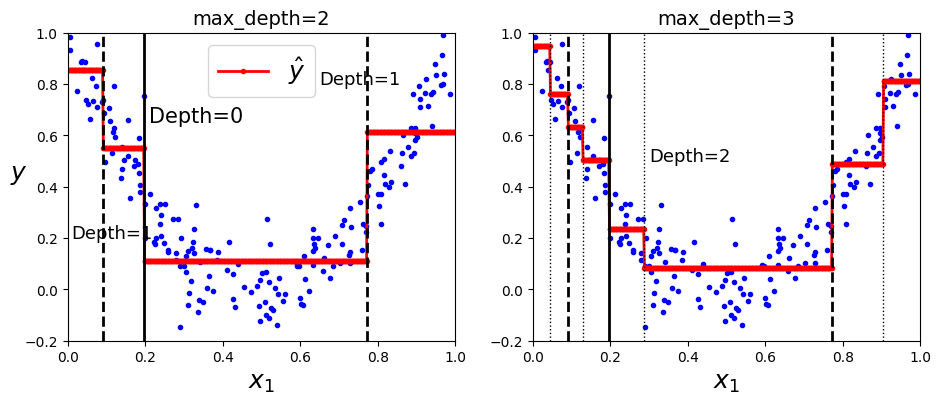

In [21]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

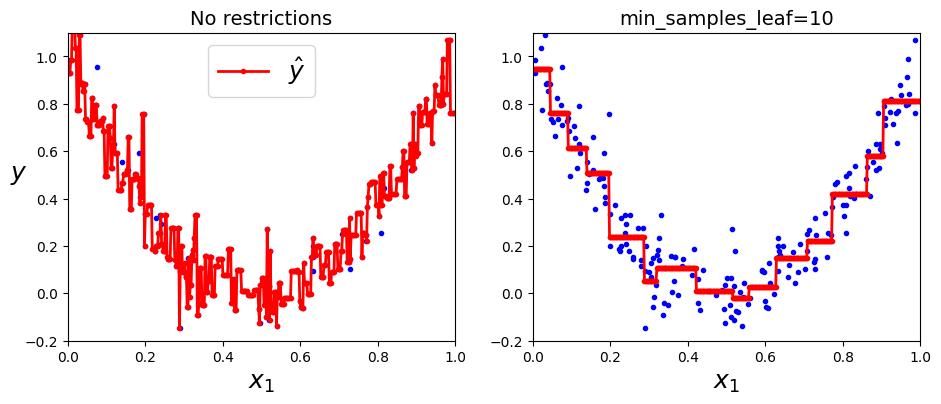

In [22]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

### Sensitivity to rotations


Because decision trees make orthogonal splits they can be sensitive to rotations of the data...



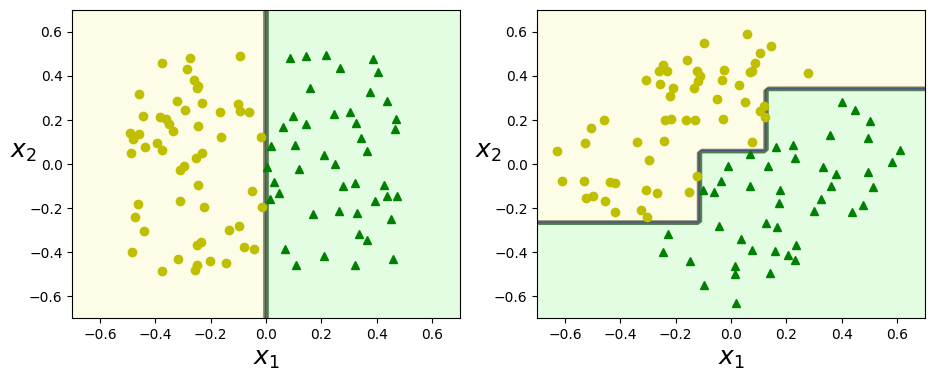

In [23]:
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()
